In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
is_out_exist = os.path.exists('out')
if not is_out_exist:
    # Create a new directory because it does not exist
    os.makedirs('out')
    print("The new directory is created!")

In [30]:
def MSE(img1, img2):
    return np.sum((img1-img2)**2)/img1.shape[0]/img1.shape[1]/img1.shape[2]
def show_image(img, name):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_histogram(img, image_type, name):
    rgb_dict = {0:'R', 1:'G', 2:'B'}
    yiq_dict = {0:'Y', 1:'I', 2:'Q'}
    fig, a = plt.subplots(1,3,figsize=(11,11),constrained_layout=True)
    for i in range(0,3):
        mean = np.mean(img[:,:,i])
        sd = np.std(img[:,:,i])
        print(mean, sd)
        textstr = '\n'.join((
        r'$\mu=%.2f$' % (mean, ),
        r'$\sigma=%.2f$' % (sd, )))
        a[i].axvline(mean, color='black', linestyle='dashed', linewidth=1)
        a[i].annotate(textstr, xy=(0.05, 0.85), xycoords='axes fraction')
        
        a[i].hist(img[:,:,i].flatten(), 256, [0, 256], color = 'r')
        if image_type == 'RGB':
            a[i].set_title(name + ' in ' + rgb_dict[i])    
        elif image_type == 'YIQ':
            a[i].set_title(name + ' in ' + yiq_dict[i])
    plt.savefig('.\\out\\' + name + '.jpg')
    plt.show()

In [31]:
target_image = '.\\img\\Lake.jpg'
img = cv2.imread(target_image, cv2.IMREAD_COLOR)

In [32]:
def rgb_to_yiq(img, rgb2yiq):
    res = np.zeros(img.shape, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res[i, j] = rgb2yiq.dot(img[i, j])
    return res
def yiq_gamma_trasnform(img, gamma):
    res = np.zeros(img.shape, dtype=np.float32)
    max_y = np.max(img[:,:,0])
    min_y = np.min(img[:,:,0])
    L = max_y - min_y
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res[i, j, 0] = ((img[i, j,0] - min_y)/L)**gamma * L + min_y
            res[i, j,1:] = img[i, j,1:]
    return res
def yiq_to_rgb(img, yiq2rgb):
    res = np.zeros(img.shape, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res[i, j] = yiq2rgb.dot(img[i, j])
    return res

In [33]:
rgb_to_yiq_matrix = np.array([[0.299, 0.587, 0.114], [0.596, -0.274, -0.322], [0.211, -0.523, 0.312]])
yiq_to_rgb_matrix = np.array([[1, 0.956, 0.621], [1, -0.272, -0.647], [1, -1.106, 1.703]])

## adjust `gamma_value`

In [34]:
gamma_value = 3.9

In [35]:
yiq_img = rgb_to_yiq(img, rgb_to_yiq_matrix)
yiq_gamma_trasnform_img = yiq_gamma_trasnform(yiq_img, gamma_value)
yiq_to_rgb_img = yiq_to_rgb(yiq_gamma_trasnform_img, yiq_to_rgb_matrix)
#show_image(yiq_to_rgb_img.astype(np.uint8), 'gamma transform')
cv2.imwrite('.\\out\\gamma_img.jpg', yiq_to_rgb_img.astype(np.uint8))

True

196.7031883630204 49.75373205828248
220.62696505569528 29.583241994602826
217.3010272829937 29.293310019189885


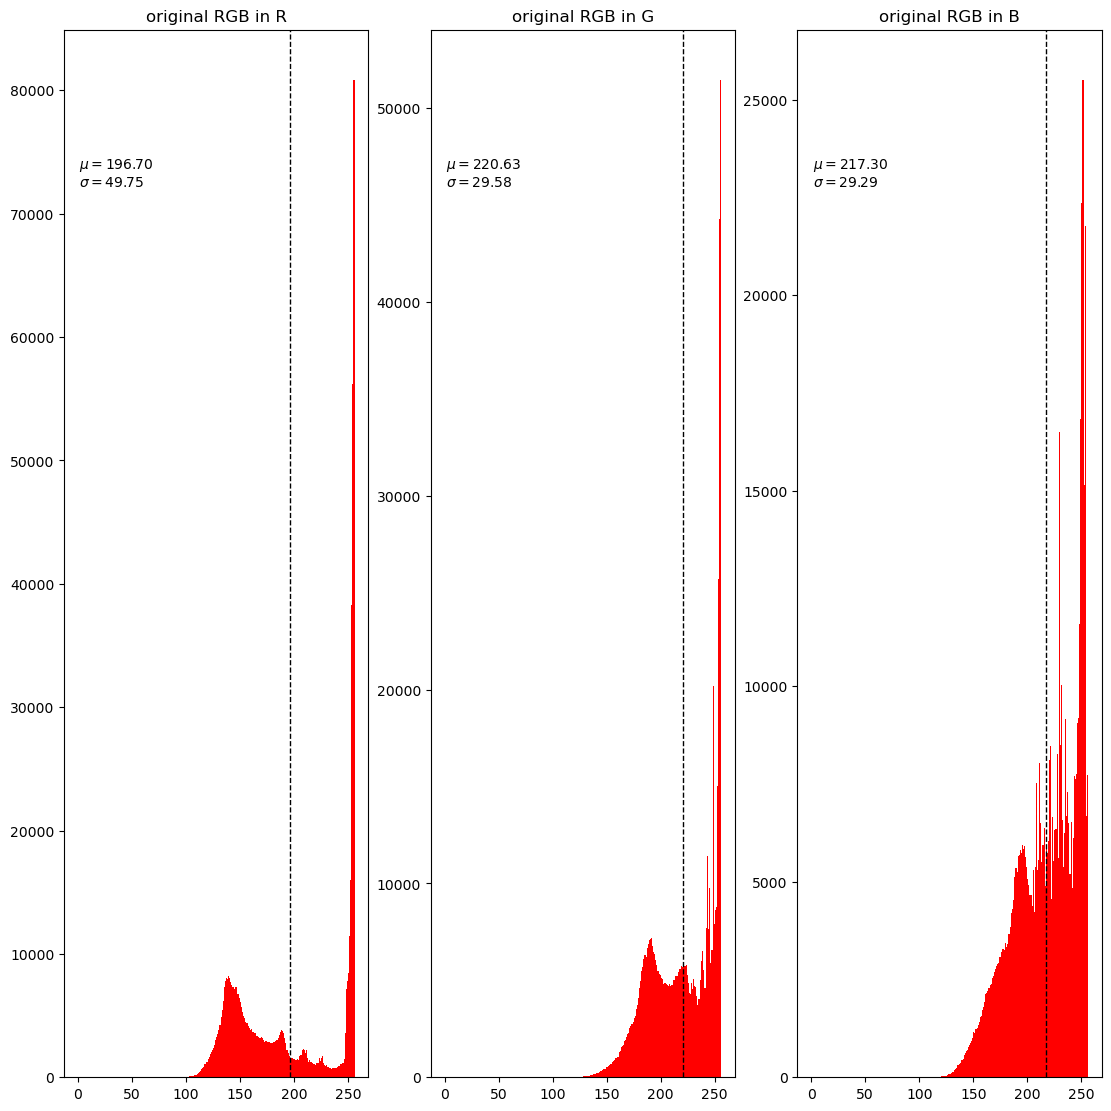

213.09454 33.970047
-13.187618 18.379616
-6.08561 7.0082717


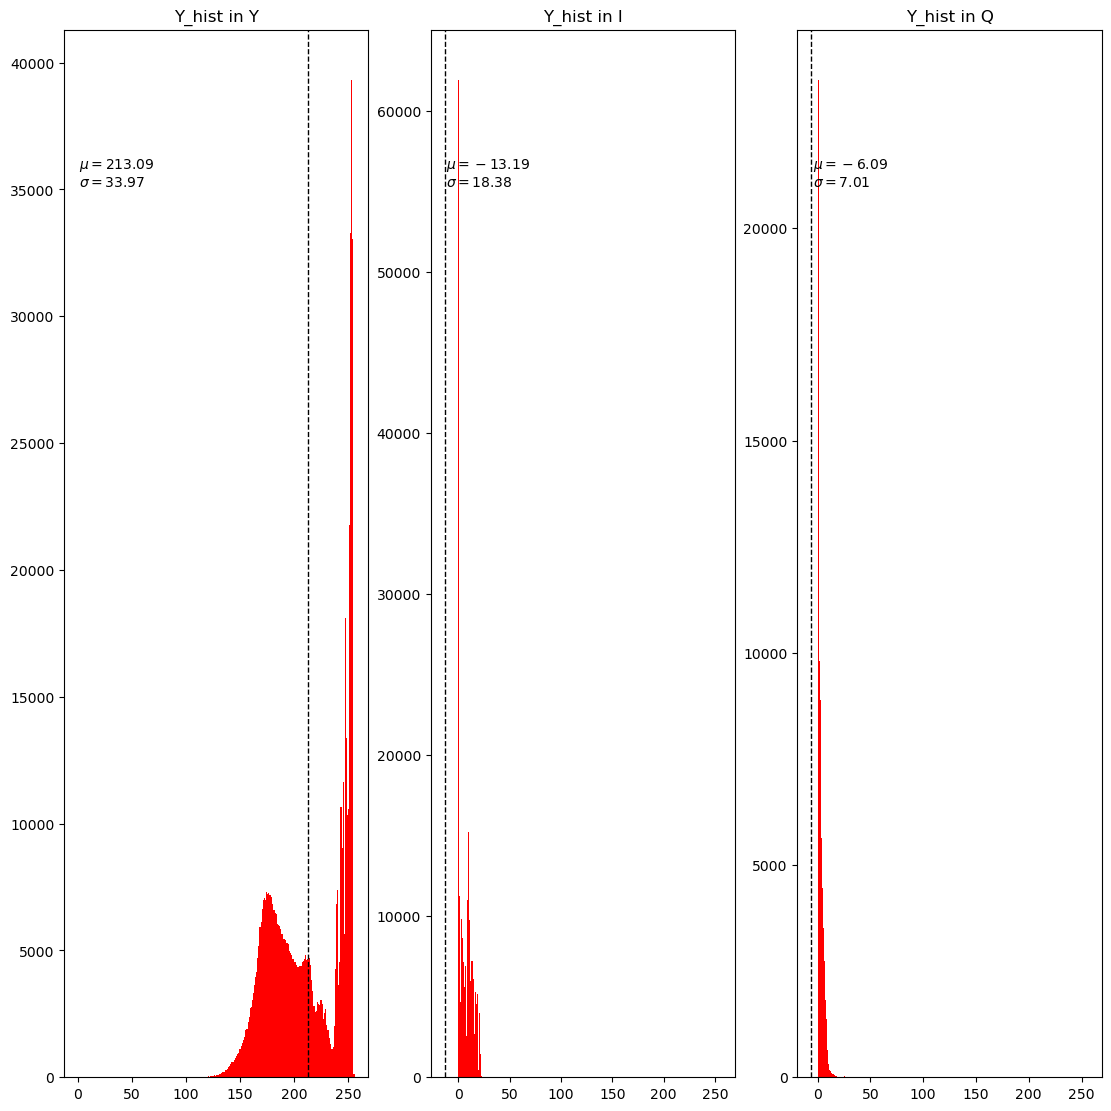

169.1889 56.374706
-13.187618 18.379616
-6.08561 7.0082717


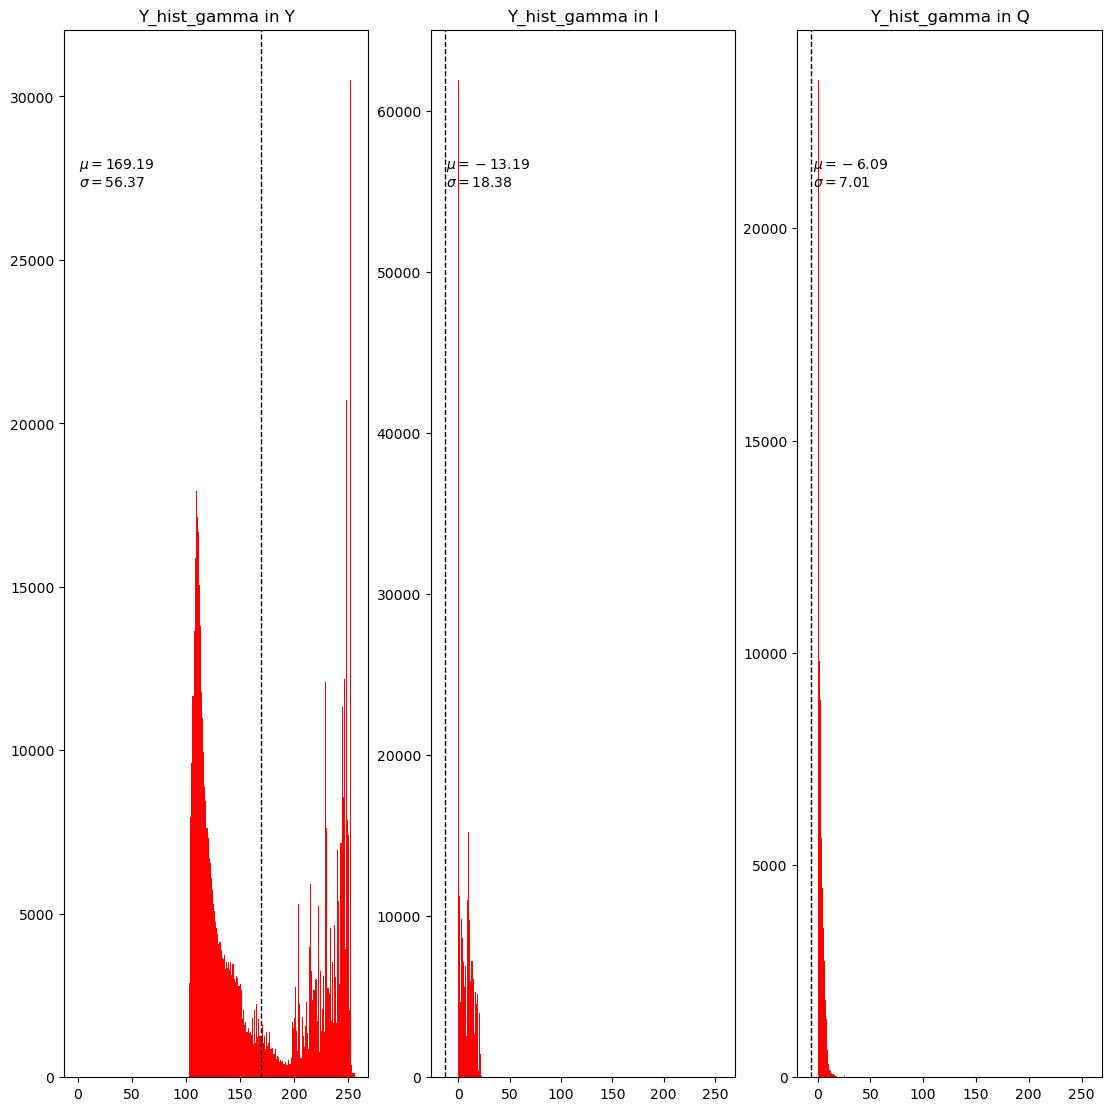

152.80232 72.57296
176.71326 51.13227
173.4106 48.34692


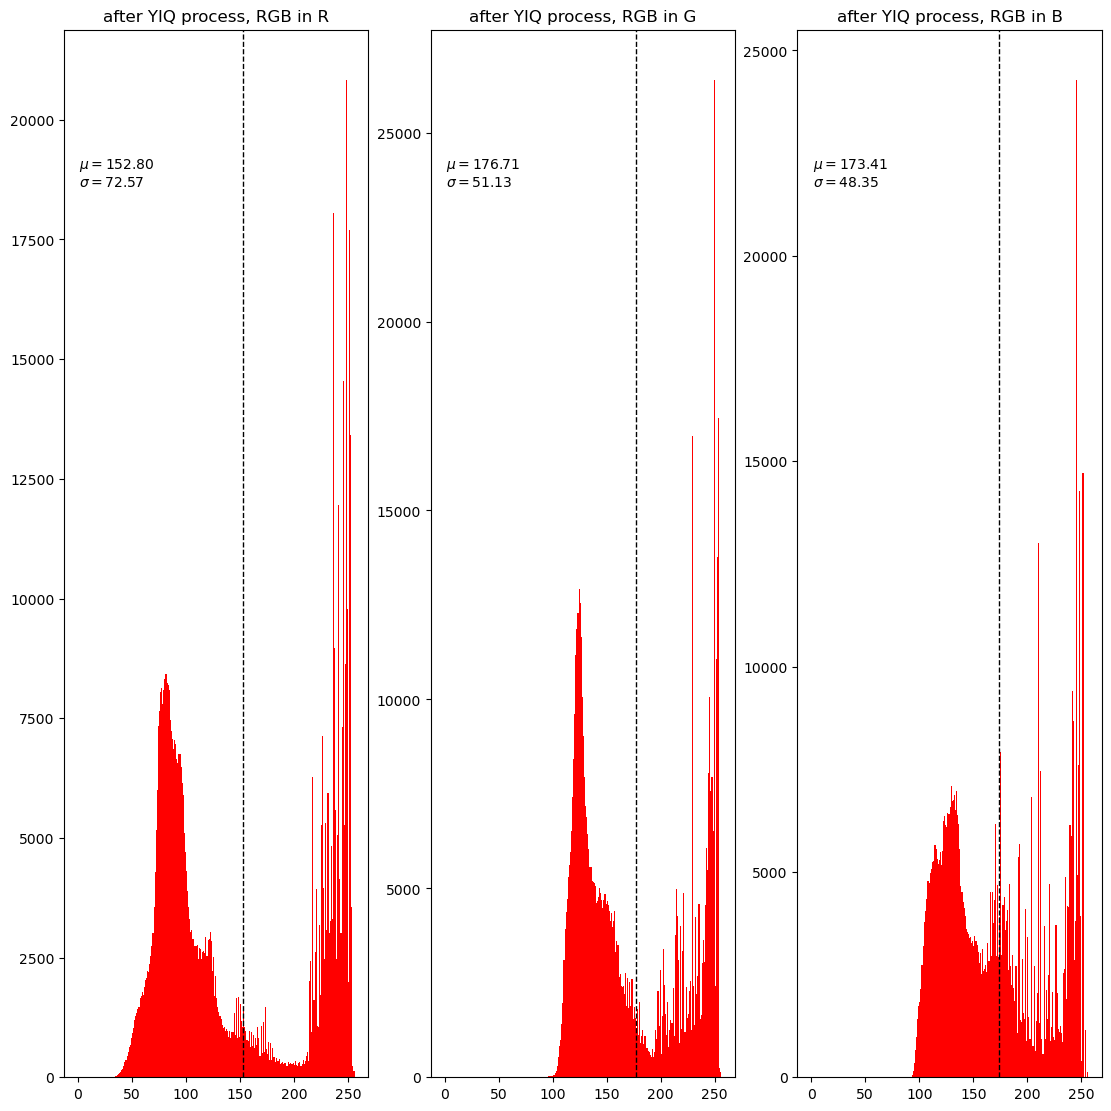

In [36]:
show_histogram(img, 'RGB', 'original RGB')
show_histogram(yiq_img, 'YIQ', 'Y_hist')
show_histogram(yiq_gamma_trasnform_img, 'YIQ', 'Y_hist_gamma')
show_histogram(yiq_to_rgb_img, 'RGB', 'after YIQ process, RGB')